# Building a Handwritten Digits Classifier
In this project we'll use the built in function load_digits() to test different neural network models on to explore the complexity and limitations of image classification, then use multiple choices of hidden layers to understand how to optimise accuracy.  
We'll start by importing the dataset from the function and begin the train - testing process of some deep neural networks.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_digits()

In [2]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
dig_data = pd.DataFrame(data['data'])
labels = pd.Series(data['target'])

dig_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


To visualise the image from a row of pixel values, we'll use reshape each row as an 8x8 matrix using the .reshape() function.

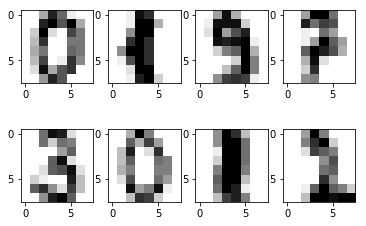

In [15]:

first = [0,99,199,299]
second = [999,1099,1199,1299]
enf = enumerate(first)
ens = enumerate(second)

figure, ax = plt.subplots(2,4)

for i,j in enf:
    ax[0,i].imshow(dig_data.iloc[j].values.reshape(8,8), cmap='gray_r')

for i,j in ens:
    ax[1,i].imshow(dig_data.iloc[j].values.reshape(8,8), cmap='gray_r')

# K Nearest Neighbours Model
We'll split the data in half; one to test and the other to train our model and plot the classification accuracies with KNeighborsClassifier for different k values.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

train = dig_data[0:round(len(dig_data)/2)]
test = dig_data[(round(len(dig_data)/2)):]

def train(n_neighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    prediction = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = prediction
    accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return accuracy
    
def cross_validate(k):
    accuracy = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(dig_data):
        train_features, test_features = dig_data.loc[train_index], dig_data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        accuracy.append(overall_accuracy)
    return accuracy

cross_k1 = cross_validate(1)
np.mean(cross_k1)

0.9677233358079684

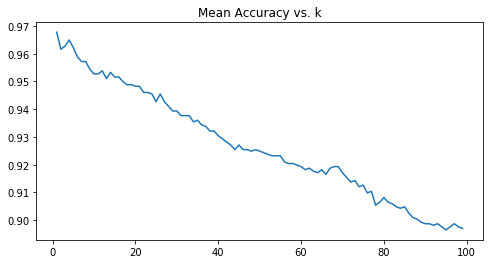

In [38]:
k_values = list(range(1,100))
overall_accuracies = []

for k in k_values:
    accuracies = cross_validate(k)
    mean_accuracy = np.mean(accuracies)
    overall_accuracies.append(mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, overall_accuracies)

There are several drawbacks to using k-nearest neighbours, that being quite computationally expensive and no model representation that we could explore and debug.  

# Neural Network With a Single Hidden Layer
We'll alter the previous functions to use the MLPClassifier and again plot the classification accuracies.

In [47]:
from sklearn.neural_network import MLPClassifier

train = dig_data[0:round(len(dig_data)/2)]
test = dig_data[(round(len(dig_data)/2)):]

def train(hidden_layer, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = hidden_layer)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    prediction = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = prediction
    accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return accuracy
    
def cross_validate(k):
    accuracy = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(dig_data):
        train_features, test_features = dig_data.loc[train_index], dig_data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        accuracy.append(overall_accuracy)
    return accuracy


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

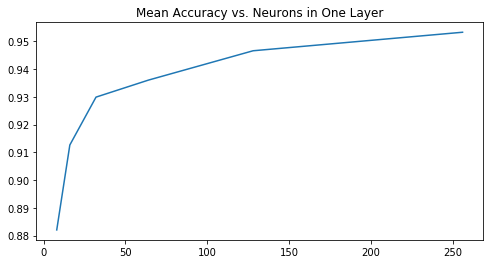

In [49]:
hidden_layers = [(8,), (16,), (32,), (64,), (128,), (256,)]
overall_accuracies = []

for n in hidden_layers:
    overall_accuracies.append(np.mean(cross_validate(n)))
          

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons in One Layer")
x_axis = [x[0] for x in hidden_layers]
plt.plot(x_axis, overall_accuracies)

## Summary
It appears that using more neurons hugely improve our accuracy from approximately 88% to 95%. However using k nearest neighbours achieved 95% also, so there is not much point of choosing one over the other.

# Neural Network With Two Hidden Layers

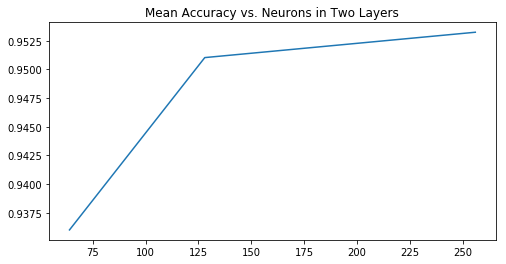

In [51]:
hidden_layers = [(64,64),(128,128),(256,256)]
overall_accuracies = []

for n in hidden_layers:
    overall_accuracies.append(np.mean(cross_validate(n)))
          

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons in Two Layers")
x_axis = [x[0] for x in hidden_layers]
plt.plot(x_axis, overall_accuracies)

## Summary 
Using 2 hidden layers have improved our accuracy compared to a single hidden layer by about 0.5%. We'll try 3 hidden layers and increase cross-fold validation to 8.

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

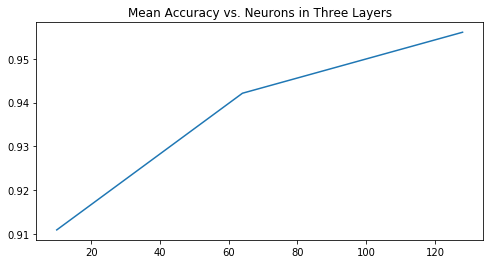

In [53]:
def cross_validate(k):
    accuracy = []
    kf = KFold(n_splits = 8, random_state=2)
    for train_index, test_index in kf.split(dig_data):
        train_features, test_features = dig_data.loc[train_index], dig_data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        accuracy.append(overall_accuracy)
    return accuracy

hidden_layers = [(10,10,10),(64,64,64),(128,128,128)]
overall_accuracies = []

for n in hidden_layers:
    overall_accuracies.append(np.mean(cross_validate(n)))
          

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons in Three Layers")
x_axis = [x[0] for x in hidden_layers]
plt.plot(x_axis, overall_accuracies)

## Summary
Using 3 hidden layers has increased our accuracy to about 96%, even with 8 fold cross validation, eliminating some worry of overfitting. This is in line with research about deep neural networks; having more layers and more neurons increases accuracy and in turn the networks performance.